In [3]:
pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20430 sha256=711a092654be6a47dbb41122937590f92991b4e0401f6579e33e77481fb196d8
  Stored in directory: /Users/meetmehta/Library/Caches/pip/wheels/69/f5/e5/18ad53fe1ed6b2af9fad05ec052e4acbac8e92441df44bad2e
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3513 sha256=3e78607f0dd2e8d6afabf1213912c2667552b5d685c8cdf0b0dabe920107527c
  Stored in directory: /Users/meetmehta/Library/Caches/pip/wheels/9d/ff/2f/afe4cd56f47de147407705626517d68bea0f3b74eb1fb168e6
Successfully built fst-pso miniful
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1
Note:

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import SpectralClustering
from node2vec import Node2Vec as n2v

In [2]:
def generate_graph_deg_dist(deg_dist, n):
    '''
    This function will generate a networkx graph G based on a degree distribution
    provided by the user.
    
    params:
        deg_dist (Dictionary) : The key will be the degree and the value is the probability
                                of a node having that degree. The probabilities must sum to
                                1
        n (Integer) : The number of nodes you want the graph to yield
                          
    example:
        G = generate_graph_deg_dist(
                deg_dist = {
                    6:0.2,
                    3:0.14,
                    8:0.35,
                    4:0.3,
                    11:0.01
                },
                n = 1000
        )
    '''
    deg = list(deg_dist.keys())
    proba = list(deg_dist.values())
    if sum(proba) == 1.:
        deg_sequence = np.random.choice(
            deg,
            n,
            proba
        )

        if sum(deg_sequence) % 2 != 0:
            # to ensure that the degree sequence is always even for the configuration model
            deg_sequence[1] = deg_sequence[1] + 1

        return nx.configuration_model(deg_sequence)
    raise ValueError("Probabilities do not equal to 1")
    
G = generate_graph_deg_dist(
        deg_dist = {
            6:0.2,
            3:0.14,
            8:0.35,
            4:0.3,
            11:0.01
        },
        n = 200
)

print(nx.info(G))

MultiGraph with 200 nodes and 630 edges


/tmp/ipykernel_16140/2536977359.py:51: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


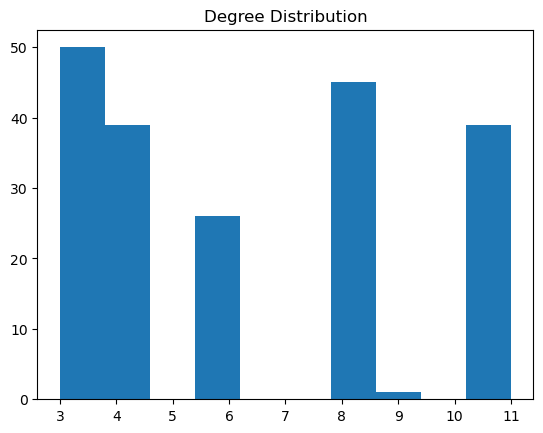

In [3]:
plt.clf()
plt.hist(list(dict(G.degree()).values()))
plt.title('Degree Distribution')
plt.show()

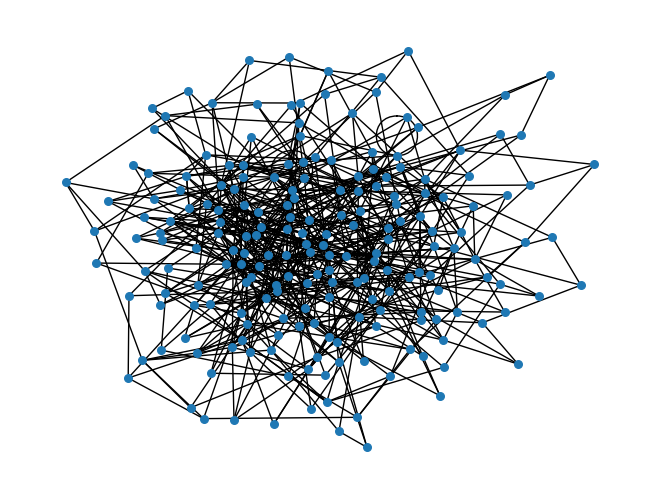

In [4]:
nx.draw(G, node_size = 30)